In [1]:
from Colorization_Network import colorization
test = colorization()
#test.build_model(batch_size=5,filename='model.save')

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 4007)


grayscale found: 15xLBQJOKl3N5RNK6pY4AM9Xr8S.jpg
grayscale found: 1hvua0Nf72KWTgekyc5oLv7Knkc.jpg
grayscale found: 1o3xawIjIuHF3E3PtR2tldeueS6.jpg
grayscale found: 1sIabslJxTvkriluPyGWWVME4JT.jpg
grayscale found: 1tLb3gznIDWxl3r6rji20S5oCaw.jpg
Creating matrices for batch number 1
grayscale found: 1w9sOGLpH6P5TUhudUgQRrMYDg9.jpg
grayscale found: 1YMNL9YfVtM9mmD9CjKRaLsaKV7.jpg
grayscale found: 25slHIlAq6lKPFfnX2F3sG6TQdo.jpg
grayscale found: 29Dcf1NFmhDfC3ZuM9HzmfqMQiP.jpg
grayscale found: 2bJgUYO2ffbzXUgqFEwG4hTlCCr.jpg
grayscale found: 2C4XRT2yO6LTUViyduybpEfsJCE.jpg
grayscale found: 2EflqMfHZUkYKMF1jAoM1rFspEg.jpg
grayscale found: 2evLgzuIc40OoybU8mPbsiKRNjt.jpg
grayscale found: 2hUB03FXuG72Zsa4rlXVopEzokm.jpg
error image: 2NKBHDZOT0NlhhT5ZEc5jamaUhX.jpg
Creating matrices for batch number 2
grayscale found: 2OQFuEilTVpMXBuidEpwC9dpAUT.jpg
grayscale found: 2RisjBLIqZIU2enSFehLXcOXtaF.jpg
grayscale found: 2sjmFPLlTml2T2cCKcDTqUEKZOX.jpg
grayscale found: 2t2znlPt2xFoVBOwnDzygfrn2ea.jpg

In [ ]:
from Colorization_Network import colorization
test = colorization()
test.build_model(batch_size=5,filename='model.save')

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 4007)


... building the model


In [ ]:
test.train_network(n_epochs=1000,learning_rate=0.00001,batch_num=1)

Loading Batch 1
(200L, 65536L)
Current training data size is 200
... training
('training @ iter = ', 0L)
epoch 1, minibatch 1/40, loss of 17327.060547


In [4]:
test.save_params('model.save')

In [2]:
result = test.test_network(batch_ind=1,ind=2)

Loading Batch 1
(200L, 65536L)
Current test data size is 200


In [3]:
s = dfstoppersd()

NameError: name 'dfstoppersd' is not defined

In [9]:
result[2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io,measure
%load_ext autoreload
%autoreload 2
from project_nn import dec_net_out_to_rgb
%matplotlib inline
po = dec_net_out_to_rgb(result[1][0,:,:,:],result[0][0,:,:,:])


In [ ]:
np.shape(result[1][0,:,:,:])

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io,measure
%load_ext autoreload
%autoreload 2
%matplotlib inline
from project_nn import dec_net_out_to_rgb
plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
for i in range(9):
    po = dec_net_out_to_rgb(result[1][0,:,:,:],result[0][0,:,:,:]+50,i*0.1+0.1)
    plt.subplot(1,9,i+1)
    plt.imshow(color.lab2rgb(po))
plt.show()

In [6]:
image_net_out=result[1][0,:,:,:]
data_l = result[0][0,:,:,:]+50
#image_net_out is a tensor of shape (313,256,256) and data_l is a tensor of shape (1,256,256)
temp = 0.6
ref_Qcolor_bins = numpy.load('pts_in_hull.npy')
image_net_out_matrix = numpy.exp(numpy.log(image_net_out.transpose(1,2,0).reshape(256*256, 313))/temp)
image_net_out_matrix = image_net_out_matrix/image_net_out_matrix.sum(axis=1, keepdims=True)
data_ab = numpy.dot(image_net_out_matrix, ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(1,256,256)
data_b_chan = (data_ab[:,1]).reshape(1,256,256)
img_construct = numpy.concatenate((data_a_chan, data_b_chan), axis=0)
img_construct = numpy.concatenate((data_l, img_construct), axis=0)

#reconstructed image is returned in 256x256x3 format
img_construct = img_construct.transpose(1,2,0)

In [ ]:
data_a_chan

In [ ]:
data_a_chan

In [ ]:
temp = 0.7
image_net_out_matrix2=numpy.exp(numpy.log(image_net_out.transpose(1,2,0).reshape(256*256, 313))/temp)
print(image_net_out_matrix2/image_net_out_matrix2.sum(axis=1, keepdims=True))

In [5]:
temp = 0.1
import numpy
from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
ref_Qcolor_bins = numpy.load('pts_in_hull.npy')
image_net_out_matrix = numpy.exp(numpy.log(result[2][0,:,:,:].transpose(1,2,0).reshape(256*256, 313))/temp)
data_l = result[0][0,:,:,:]
print(np.shape(image_net_out_matrix))

image_net_out_matrix = image_net_out_matrix/image_net_out_matrix.sum(axis=1, keepdims=True)
data_ab = numpy.dot(image_net_out_matrix, ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(1,256,256)
data_b_chan = (data_ab[:,1]).reshape(1,256,256)
img_construct = numpy.concatenate((data_a_chan, data_b_chan), axis=0)
img_construct = numpy.concatenate((data_l+50, img_construct), axis=0)
img_construct = img_construct.transpose(1,2,0)

ValueError: total size of new array must be unchanged

C:\Users\V\Anaconda2\lib\site-packages\skimage\color\colorconv.py:901: UserWarning: Color data out of range: Z < 0 in 274 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


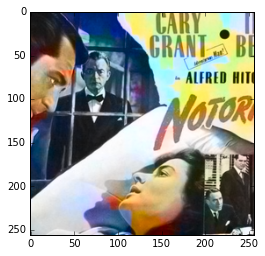

In [7]:
plt.imshow(color.lab2rgb(img_construct))

In [4]:
import numpy as np
ind = 2
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[0][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 1:
    data_ab = np.dot(image_net_out_flattened.reshape(313,65536).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(65536,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(256,256,1)
data_b_chan = (data_ab[:,1]).reshape(256,256,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,:,:].reshape(256,256,1)+50, img_construct), axis=2)
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

ValueError: total size of new array must be unchanged

In [ ]:
np.shape(result[0][0,:,:,:].transpose(1,2,0))

In [ ]:
ind = 0
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[1][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
#img_construct = img_construct.transpose(1,2,0)import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

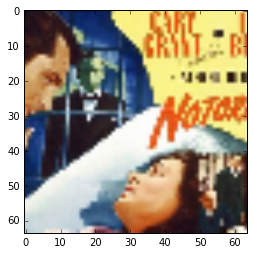

In [8]:
ind = 2
image_net_out_flattened = result[ind][0].flatten()
data_l = result[0][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
#img_construct = img_construct.transpose(1,2,0)import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [9]:
result[ind][0]

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.02850584,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [ ]:

ref_prior = np.load('./prior_probs.npy')

In [ ]:
np.shape(ab_enc)

In [ ]:

from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
import numpy as np
from project_test_mehmet import load_data
from project_util import encode_ab_to_Q 

data_set = load_data('data', False)
data_a_chan = data_set[1][219][:64*64]
data_b_chan = data_set[1][219][64*64:2*64*64]
distances, indices, wts = encode_ab_to_Q(data_a_chan, data_b_chan)

In [ ]:
img_enc = np.zeros((64*64, 313 ))
x_ind =np.arange(0,4096,dtype='int')[:,np.newaxis]
img_enc[x_ind, indices] = wts
img_flt = img_enc.flatten()
print img_flt.reshape(4096,313)[0]

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import os, sys
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io
import theano
%matplotlib inline

data_l = ((result[0][3]).reshape(1,256,256)).transpose(1,2,0)
data_ab_y = ((result[1][3]).reshape(2,256,256)).transpose(1,2,0)
data_ab_nn = ((result[2][3]).reshape(2,256,256)).transpose(1,2,0)
img_construct = np.concatenate((data_l.astype(np.float64),data_ab_nn.astype(np.float64)), axis=2)
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
hello = None

In [ ]:
print(loaded_objects[0])

In [ ]:

loaded_objects = []
for i in range(30):
    loaded_objects.append(None)

In [ ]:
toot4

In [ ]:
from Colorization_Network import colorization
test = colorization()
test.build_model(batch_size=5,filename='model.save')

In [ ]:
test = colorization()

In [ ]:
test.build_model(batch_size=5,filename='model.save')

In [ ]:
test.save_params('model.save')

In [ ]:
test.train_network(n_epochs=500,learning_rate=0.00001,batch_num=1)

In [ ]:
test.train_network(n_epochs=1000,learning_rate=0.00001,batch_num=1)

In [ ]:
result = test.test_network(batch_ind=1,ind=2)

In [ ]:
loaded_objects[0][0].get_value()

In [ ]:
loaded_objects[0][1].get_value()

In [ ]:
test.convrelu1_1.params[1].get_value()